In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install fastBert
!pip install pytorch
!pip install transformers
!pip install pytorch-toolbelt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 219 kB 14.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
    Running setup.py install for pytorch ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-dflpoftg/pytorch_9cb314789e2b45f6bf7dd84acafdac14/setup.py'"'"'; __file__='"'"'/tmp/pip-install-dflpoftg/pytorch_9cb314789e2b45f6bf7dd84acafdac14/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp

## Initialize Basic Bert Model

In [4]:
f=open("/content/drive/MyDrive/Amazon_review/train.txt","r")
result=[]
for line in f.readlines()[:2000]:
  line=line.strip().split("/t")
  text=line[0][11:]
  label=int(line[0][9])-1
  line=[text,label]
  result.append(line)

f.close()
training_loader=pd.DataFrame(result,columns=["text","label"])# 1 for positive, 0 for negative
training_loader

,text,label
0,Stuning even for the non-gamer: This sound tra...,1
1,The best soundtrack ever to anything.: I'm rea...,1
2,Amazing!: This soundtrack is my favorite music...,1
3,Excellent Soundtrack: I truly like this soundt...,1
4,"Remember, Pull Your Jaw Off The Floor After He...",1
...,...,...
1995,Too Small for a Shower Curtain: This rod is wa...,0
1996,"Pretty, but not functional: This curtain rod l...",0
1997,Poor Quality: This item does not look like the...,0
1998,Umbra tension rod: I am pleased with my Umbra ...,1


In [5]:
f=open("/content/drive/MyDrive/Amazon_review/test.txt","r")
test_result=[]
for line in f.readlines()[:200]:
  line=line.strip().split("/t")
  text=line[0][11:]
  label=int(line[0][9])-1
  line=[text,label]
  test_result.append(line)

f.close()
test_loader=pd.DataFrame(test_result,columns=["text","label"])
test_loader

,text,label
0,Great CD: My lovely Pat has one of the GREAT v...,1
1,One of the best game music soundtracks - for a...,1
2,Batteries died within a year ...: I bought thi...,0
3,"works fine, but Maha Energy is better: Check o...",1
4,Great for the non-audiophile: Reviewed quite a...,1
...,...,...
195,"The meaning of God, the meaning of life.: Both...",1
196,What a disappointment!: I am a big Belva Plain...,0
197,You get what you pay for.: I was expecting a b...,0
198,junk!: Don't buy this! Didn't even come with a...,0


In [6]:
import re
def formattingText(string):
  string = re.sub(r'[^\w\s]', '', string)
  return string
training_loader['cleantext'] = training_loader.text.apply(lambda x:formattingText(x))
training_loader

,text,label,cleantext
0,Stuning even for the non-gamer: This sound tra...,1,Stuning even for the nongamer This sound track...
1,The best soundtrack ever to anything.: I'm rea...,1,The best soundtrack ever to anything Im readin...
2,Amazing!: This soundtrack is my favorite music...,1,Amazing This soundtrack is my favorite music o...
3,Excellent Soundtrack: I truly like this soundt...,1,Excellent Soundtrack I truly like this soundtr...
4,"Remember, Pull Your Jaw Off The Floor After He...",1,Remember Pull Your Jaw Off The Floor After Hea...
...,...,...,...
1995,Too Small for a Shower Curtain: This rod is wa...,0,Too Small for a Shower Curtain This rod is way...
1996,"Pretty, but not functional: This curtain rod l...",0,Pretty but not functional This curtain rod loo...
1997,Poor Quality: This item does not look like the...,0,Poor Quality This item does not look like the ...
1998,Umbra tension rod: I am pleased with my Umbra ...,1,Umbra tension rod I am pleased with my Umbra t...


In [7]:
test_loader['cleantext'] = test_loader.text.apply(lambda x:formattingText(x))
test_loader

,text,label,cleantext
0,Great CD: My lovely Pat has one of the GREAT v...,1,Great CD My lovely Pat has one of the GREAT vo...
1,One of the best game music soundtracks - for a...,1,One of the best game music soundtracks for a ...
2,Batteries died within a year ...: I bought thi...,0,Batteries died within a year I bought this ch...
3,"works fine, but Maha Energy is better: Check o...",1,works fine but Maha Energy is better Check out...
4,Great for the non-audiophile: Reviewed quite a...,1,Great for the nonaudiophile Reviewed quite a b...
...,...,...,...
195,"The meaning of God, the meaning of life.: Both...",1,The meaning of God the meaning of life Both of...
196,What a disappointment!: I am a big Belva Plain...,0,What a disappointment I am a big Belva Plain f...
197,You get what you pay for.: I was expecting a b...,0,You get what you pay for I was expecting a big...
198,junk!: Don't buy this! Didn't even come with a...,0,junk Dont buy this Didnt even come with all th...


In [8]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import TensorDataset, DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
model.to(device)

text_data = training_loader['cleantext'].tolist()
encoded_inputs = tokenizer.batch_encode_plus(text_data, return_attention_mask=True, return_tensors='pt',padding=True,truncation=True)
input_ids = encoded_inputs['input_ids'].to(device)
attention_mask = encoded_inputs['attention_mask'].to(device)
labels =  training_loader['label'].tolist()

train_dataset = TensorDataset(input_ids, attention_mask, torch.tensor(labels,device=device))


test_data = test_loader['cleantext'].tolist()
encoded_inputs = tokenizer.batch_encode_plus(test_data, return_attention_mask=True, return_tensors='pt',padding=True,truncation=True)
test_input_ids = encoded_inputs['input_ids'].to(device)
test_attention_mask = encoded_inputs['attention_mask'].to(device)
test_labels =  test_loader['label'].tolist() 

test_dataset = TensorDataset(test_input_ids, test_attention_mask, torch.tensor(test_labels,device=device))


train_size = int(0.8 * len(train_dataset))
validation_size = len(train_dataset) - train_size
train_dataset, validation_dataset = torch.utils.data.random_split(train_dataset, [train_size, validation_size])

batch_size = 16
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [9]:
num_epochs=7
my_loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.5e-5)

"""
1. batch size (add dataloader)
2. lr (~64 bacth size with 2e-5 lr)
3. add sample

- merge val pred to train
- add log frequency
"""

'\n1. batch size (add dataloader)\n2. lr (~64 bacth size with 2e-5 lr)\n3. add sample\n\n- merge val pred to train\n- add log frequency\n'

## Training

In [10]:
training_loss_list=[]
validation_loss_list=[]
accuracy_list=[]

import time

start_time = time.time()
for epoch in range(num_epochs): 
  # Training
  model.train()
  total_loss = 0
  for input_ids, attention_mask, labels in train_dataloader:
    input_ids = input_ids.to(device)
    attention_mask = attention_mask.to(device)
    labels = labels.to(device)
    outputs = model(input_ids, attention_mask=attention_mask)
    loss = my_loss(outputs.logits, labels)
    total_loss += loss.item()
    optimizer.zero_grad()
    loss.backward()
    # grad clipping
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
    optimizer.step()
  avg_loss = total_loss / len(train_dataloader)
  print(f'Epoch {epoch+1}/{num_epochs}: average training loss = {avg_loss:.4f}')
  training_loss_list.append(avg_loss)
  
  # Validation
  model.eval()
  total_loss = 0
  correct = 0
  total = 0
  with torch.no_grad():
    for input_ids, attention_mask, labels in validation_dataloader:
      input_ids = input_ids.to(device)
      attention_mask = attention_mask.to(device)
      labels = labels.to(device)
      outputs = model(input_ids, attention_mask=attention_mask)
      loss = my_loss(outputs.logits, labels)
      total_loss += loss.item()
      predictions = outputs.logits.argmax(dim=1)
      correct += (predictions == labels).sum().item()
      total += labels.size(0)
    avg_loss = total_loss / len(validation_dataloader)
    accuracy = correct / total
    print(f'Epoch {epoch+1}/{num_epochs}: average validation loss = {avg_loss:.4f}, accuracy = {accuracy:.4f}')
    validation_loss_list.append(avg_loss)
    accuracy_list.append(accuracy)

end_time = time.time()
elapsed_time = end_time - start_time

model.eval()
total_loss = 0
correct = 0
total = 0
with torch.no_grad():
  for input_ids, attention_mask, labels in test_dataloader:
    input_ids = input_ids.to(device)
    attention_mask = attention_mask.to(device)
    labels = labels.to(device)
    outputs = model(input_ids, attention_mask=attention_mask)
    loss = my_loss(outputs.logits, labels)
    total_loss += loss.item()
    predictions = outputs.logits.argmax(dim=1)
    correct += (predictions == labels).sum().item()
    total += labels.size(0)
  avg_loss = total_loss / len(test_dataloader)
  accuracy = correct / total
  print(f'Test: average loss = {avg_loss:.4f}, accuracy = {accuracy:.4f}')
print(f'Training took {elapsed_time:.2f} seconds')

Epoch 1/7: average training loss = 0.6197
Epoch 1/7: average validation loss = 0.5207, accuracy = 0.7575
Epoch 2/7: average training loss = 0.2981
Epoch 2/7: average validation loss = 0.2214, accuracy = 0.9225
Epoch 3/7: average training loss = 0.1785
Epoch 3/7: average validation loss = 0.2372, accuracy = 0.9225
Epoch 4/7: average training loss = 0.1227
Epoch 4/7: average validation loss = 0.2243, accuracy = 0.9300
Epoch 5/7: average training loss = 0.0863
Epoch 5/7: average validation loss = 0.3172, accuracy = 0.9200
Epoch 6/7: average training loss = 0.0567
Epoch 6/7: average validation loss = 0.2552, accuracy = 0.9375
Epoch 7/7: average training loss = 0.0465
Epoch 7/7: average validation loss = 0.3824, accuracy = 0.9150
Test: average loss = 0.4817, accuracy = 0.8800
Training took 558.37 seconds


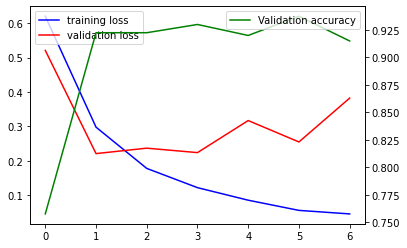

In [11]:
import matplotlib.pyplot as plt
epochs = [i for i in range(num_epochs)]
fig, ax1 = plt.subplots()
ax1.plot(epochs, training_loss_list, 'b-', label='training loss')
ax1.plot(epochs, validation_loss_list, 'r-', label='validation loss')
ax2 = ax1.twinx()
ax2.plot(epochs, accuracy_list, 'g-', label='Validation accuracy')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

## Focal loss version of basic Bert

In [12]:
from pytorch_toolbelt.losses.focal import FocalLoss

start_time = time.time()
num_epochs=7
alpha = 0.20
gamma = 3
focal_loss=FocalLoss(alpha=alpha,gamma=gamma)
training_loss_list=[]
validation_loss_list=[]
accuracy_list=[]

optimizer = torch.optim.Adam(model.parameters(), lr=0.5e-5)
for epoch in range(num_epochs): 
  # Training
  model.train()
  total_loss = 0
  for input_ids, attention_mask, labels in train_dataloader:
    input_ids = input_ids.to(device)
    attention_mask = attention_mask.to(device)
    labels = labels.to(device)
    outputs = model(input_ids, attention_mask=attention_mask)
    #use focal loss here instead of cross entropy
    loss = focal_loss(outputs.logits, labels)
    total_loss += loss.item()
    optimizer.zero_grad()
    loss.backward()
    #Grad clipping
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
    optimizer.step()
  avg_loss = total_loss / len(train_dataloader)
  print(f'Epoch {epoch+1}/{num_epochs}: average training loss = {avg_loss:.4f}')
  training_loss_list.append(avg_loss)
  
  # Validation
  model.eval()
  total_loss = 0
  correct = 0
  total = 0
  with torch.no_grad():
    for input_ids, attention_mask, labels in validation_dataloader:
      input_ids = input_ids.to(device)
      attention_mask = attention_mask.to(device)
      labels = labels.to(device)
      outputs = model(input_ids, attention_mask=attention_mask)
      loss = focal_loss(outputs.logits, labels)
      total_loss += loss.item()
      predictions = outputs.logits.argmax(dim=1)
      correct += (predictions == labels).sum().item()
      total += labels.size(0)
    avg_loss = total_loss / len(validation_dataloader)
    accuracy = correct / total
    print(f'Epoch {epoch+1}/{num_epochs}: average validation loss = {avg_loss:.4f}, accuracy = {accuracy:.4f}')
    validation_loss_list.append(avg_loss)
    accuracy_list.append(accuracy)

end_time = time.time()
elapsed_time = end_time - start_time

model.eval()
total_loss = 0
correct = 0
total = 0
with torch.no_grad():
  for input_ids, attention_mask, labels in test_dataloader:
    input_ids = input_ids.to(device)
    attention_mask = attention_mask.to(device)
    labels = labels.to(device)
    outputs = model(input_ids, attention_mask=attention_mask)
    loss = focal_loss(outputs.logits, labels)
    total_loss += loss.item()
    predictions = outputs.logits.argmax(dim=1)
    correct += (predictions == labels).sum().item()
    total += labels.size(0)
  avg_loss = total_loss / len(test_dataloader)
  accuracy = correct / total
  print(f'Test: average loss = {avg_loss:.4f}, accuracy = {accuracy:.4f}')
print(f'Training took {elapsed_time:.2f} seconds')

Epoch 1/7: average training loss = 0.0106
Epoch 1/7: average validation loss = 0.1197, accuracy = 0.9000
Epoch 2/7: average training loss = 0.0034
Epoch 2/7: average validation loss = 0.1361, accuracy = 0.8950
Epoch 3/7: average training loss = 0.0016
Epoch 3/7: average validation loss = 0.1267, accuracy = 0.9100
Epoch 4/7: average training loss = 0.0020
Epoch 4/7: average validation loss = 0.0746, accuracy = 0.9425
Epoch 5/7: average training loss = 0.0009
Epoch 5/7: average validation loss = 0.1187, accuracy = 0.9175
Epoch 6/7: average training loss = 0.0002
Epoch 6/7: average validation loss = 0.1592, accuracy = 0.8975
Epoch 7/7: average training loss = 0.0002
Epoch 7/7: average validation loss = 0.0824, accuracy = 0.9350
Test: average loss = 0.1533, accuracy = 0.9050
Training took 556.99 seconds


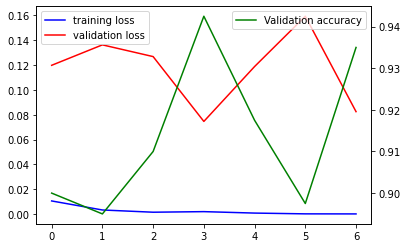

In [13]:
epochs = [i for i in range(num_epochs)]
fig, ax1 = plt.subplots()
ax1.plot(epochs, training_loss_list, 'b-', label='training loss')
ax1.plot(epochs, validation_loss_list, 'r-', label='validation loss')
ax2 = ax1.twinx()
ax2.plot(epochs, accuracy_list, 'g-', label='Validation accuracy')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

## DistillBert Version

In [14]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

start_time = time.time()



# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')
model.to(device)

text_data = training_loader['cleantext'].tolist()
encoded_inputs = tokenizer.batch_encode_plus(text_data, return_attention_mask=True, return_tensors='pt',padding=True,truncation=True)
input_ids = encoded_inputs['input_ids'].to(device)
attention_mask = encoded_inputs['attention_mask'].to(device)
labels =  training_loader['label'].tolist()

train_dataset = TensorDataset(input_ids, attention_mask, torch.tensor(labels,device=device))


test_data = test_loader['cleantext'].tolist()
encoded_inputs = tokenizer.batch_encode_plus(test_data, return_attention_mask=True, return_tensors='pt',padding=True,truncation=True)
test_input_ids = encoded_inputs['input_ids'].to(device)
test_attention_mask = encoded_inputs['attention_mask'].to(device)
test_labels =  test_loader['label'].tolist() 

test_dataset = TensorDataset(test_input_ids, test_attention_mask, torch.tensor(test_labels,device=device))


train_size = int(0.8 * len(train_dataset))
validation_size = len(train_dataset) - train_size
train_dataset, validation_dataset = torch.utils.data.random_split(train_dataset, [train_size, validation_size])

batch_size = 16
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


from pytorch_toolbelt.losses.focal import FocalLoss
num_epochs=7
alpha = 0.20
gamma = 3
focal_loss=FocalLoss(alpha=alpha,gamma=gamma)
optimizer = torch.optim.Adam(model.parameters(), lr=0.5e-5)
training_loss_list=[]
validation_loss_list=[]
accuracy_list=[]
for epoch in range(num_epochs): 
  # Training
  model.train()
  total_loss = 0
  for input_ids, attention_mask, labels in train_dataloader:
    input_ids = input_ids.to(device)
    attention_mask = attention_mask.to(device)
    labels = labels.to(device)
    outputs = model(input_ids, attention_mask=attention_mask)
    #use focal loss here instead of cross entropy
    loss = focal_loss(outputs.logits, labels)
    total_loss += loss.item()
    optimizer.zero_grad()
    loss.backward()
    #Grad clipping
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
    optimizer.step()
  avg_loss = total_loss / len(train_dataloader)
  print(f'Epoch {epoch+1}/{num_epochs}: average training loss = {avg_loss:.4f}')
  training_loss_list.append(avg_loss)
  
  # Validation
  model.eval()
  total_loss = 0
  correct = 0
  total = 0
  with torch.no_grad():
    for input_ids, attention_mask, labels in validation_dataloader:
      input_ids = input_ids.to(device)
      attention_mask = attention_mask.to(device)
      labels = labels.to(device)
      outputs = model(input_ids, attention_mask=attention_mask)
      loss = focal_loss(outputs.logits, labels)
      total_loss += loss.item()
      predictions = outputs.logits.argmax(dim=1)
      correct += (predictions == labels).sum().item()
      total += labels.size(0)
    avg_loss = total_loss / len(validation_dataloader)
    accuracy = correct / total
    print(f'Epoch {epoch+1}/{num_epochs}: average validation loss = {avg_loss:.4f}, accuracy = {accuracy:.4f}')
    validation_loss_list.append(avg_loss)
    accuracy_list.append(accuracy)

end_time = time.time()

model.eval()
total_loss = 0
correct = 0
total = 0
with torch.no_grad():
  for input_ids, attention_mask, labels in test_dataloader:
    input_ids = input_ids.to(device)
    attention_mask = attention_mask.to(device)
    labels = labels.to(device)
    outputs = model(input_ids, attention_mask=attention_mask)
    loss = focal_loss(outputs.logits, labels)
    total_loss += loss.item()
    predictions = outputs.logits.argmax(dim=1)
    correct += (predictions == labels).sum().item()
    total += labels.size(0)
  avg_loss = total_loss / len(test_dataloader)
  accuracy = correct / total
  print(f'Test: average loss = {avg_loss:.4f}, accuracy = {accuracy:.4f}')
elapsed_time = end_time - start_time
print(f'Training took {elapsed_time:.2f} seconds')

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias', 'pre_classifier

Epoch 1/7: average training loss = 0.0651
Epoch 1/7: average validation loss = 0.0498, accuracy = 0.8300
Epoch 2/7: average training loss = 0.0329
Epoch 2/7: average validation loss = 0.0279, accuracy = 0.8900
Epoch 3/7: average training loss = 0.0183
Epoch 3/7: average validation loss = 0.0311, accuracy = 0.9025
Epoch 4/7: average training loss = 0.0123
Epoch 4/7: average validation loss = 0.0326, accuracy = 0.9025
Epoch 5/7: average training loss = 0.0074
Epoch 5/7: average validation loss = 0.0432, accuracy = 0.8950
Epoch 6/7: average training loss = 0.0047
Epoch 6/7: average validation loss = 0.0518, accuracy = 0.8975
Epoch 7/7: average training loss = 0.0045
Epoch 7/7: average validation loss = 0.0588, accuracy = 0.8950
Test: average loss = 0.0446, accuracy = 0.9000
Training took 296.69 seconds


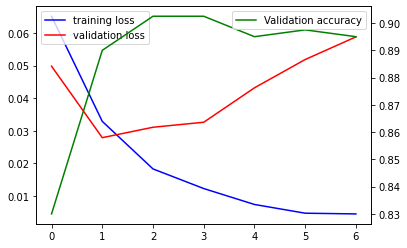

In [15]:
import matplotlib.pyplot as plt
epochs = [i for i in range(num_epochs)]
fig, ax1 = plt.subplots()
ax1.plot(epochs, training_loss_list, 'b-', label='training loss')
ax1.plot(epochs, validation_loss_list, 'r-', label='validation loss')
ax2 = ax1.twinx()
ax2.plot(epochs, accuracy_list, 'g-', label='Validation accuracy')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

In [16]:
!pip show transformers

Name: transformers
Version: 4.25.1
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache
Location: /usr/local/lib/python3.8/dist-packages
Requires: huggingface-hub, tokenizers, requests, filelock, regex, tqdm, numpy, pyyaml, packaging
Required-by: 


In [17]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 2.9 MB/s 
     |████████████████████████████████| 1.3 MB 25.5 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=45b8c4bbdc137d176f1a113f6a9f7d6d52cf6ac50a11b2e737d01949f973f32d
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


## TinyBert Version

In [18]:
from transformers import AutoTokenizer, AutoModel
import torch


start_time = time.time()

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/paraphrase-TinyBERT-L6-v2')
model = AutoModel.from_pretrained('sentence-transformers/paraphrase-TinyBERT-L6-v2')
model.to(device)

text_data = training_loader['cleantext'].tolist()
encoded_inputs = tokenizer.batch_encode_plus(text_data, return_attention_mask=True, return_tensors='pt',padding=True,truncation=True)
input_ids = encoded_inputs['input_ids'].to(device)
attention_mask = encoded_inputs['attention_mask'].to(device)
labels =  training_loader['label'].tolist()

train_dataset = TensorDataset(input_ids, attention_mask, torch.tensor(labels,device=device))


test_data = test_loader['cleantext'].tolist()
encoded_inputs = tokenizer.batch_encode_plus(test_data, return_attention_mask=True, return_tensors='pt',padding=True,truncation=True)
test_input_ids = encoded_inputs['input_ids'].to(device)
test_attention_mask = encoded_inputs['attention_mask'].to(device)
test_labels =  test_loader['label'].tolist() 

test_dataset = TensorDataset(test_input_ids, test_attention_mask, torch.tensor(test_labels,device=device))


train_size = int(0.8 * len(train_dataset))
validation_size = len(train_dataset) - train_size
train_dataset, validation_dataset = torch.utils.data.random_split(train_dataset, [train_size, validation_size])

batch_size = 16
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

from pytorch_toolbelt.losses.focal import FocalLoss
num_epochs=7
alpha = 0.20
gamma = 3
focal_loss=FocalLoss(alpha=alpha,gamma=gamma)
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)
training_loss_list=[]
validation_loss_list=[]
accuracy_list=[]
for epoch in range(num_epochs): 
  # Training
  model.train()
  total_loss = 0
  for input_ids, attention_mask, labels in train_dataloader:
    input_ids = input_ids.to(device)
    attention_mask = attention_mask.to(device)
    labels = labels.to(device)
    outputs = model(input_ids, attention_mask=attention_mask)
    #use focal loss here instead of cross entropy
    loss = focal_loss(outputs.pooler_output, labels)
    total_loss += loss.item()
    optimizer.zero_grad()
    loss.backward()
    #Grad clipping
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
    optimizer.step()
  avg_loss = total_loss / len(train_dataloader)
  print(f'Epoch {epoch+1}/{num_epochs}: average training loss = {avg_loss:.4f}')
  training_loss_list.append(avg_loss)
  
  # Validation
  model.eval()
  total_loss = 0
  correct = 0
  total = 0
  with torch.no_grad():
    for input_ids, attention_mask, labels in validation_dataloader:
      input_ids = input_ids.to(device)
      attention_mask = attention_mask.to(device)
      labels = labels.to(device)
      outputs = model(input_ids, attention_mask=attention_mask)
      loss = focal_loss(outputs.pooler_output, labels)
      total_loss += loss.item()
      predictions = outputs.pooler_output.argmax(dim=1)
      correct += (predictions == labels).sum().item()
      total += labels.size(0)
    avg_loss = total_loss / len(validation_dataloader)
    accuracy = correct / total
    print(f'Epoch {epoch+1}/{num_epochs}: average validation loss = {avg_loss:.4f}, accuracy = {accuracy:.4f}')
    validation_loss_list.append(avg_loss)
    accuracy_list.append(accuracy)

end_time = time.time()

model.eval()
total_loss = 0
correct = 0
total = 0
with torch.no_grad():
  for input_ids, attention_mask, labels in test_dataloader:
    input_ids = input_ids.to(device)
    attention_mask = attention_mask.to(device)
    labels = labels.to(device)
    outputs = model(input_ids, attention_mask=attention_mask)
    loss = focal_loss(outputs.pooler_output, labels)
    total_loss += loss.item()
    predictions = outputs.pooler_output.argmax(dim=1)
    correct += (predictions == labels).sum().item()
    total += labels.size(0)
  avg_loss = total_loss / len(test_dataloader)
  accuracy = correct / total
  print(f'Test: average loss = {avg_loss:.4f}, accuracy = {accuracy:.4f}')
elapsed_time = end_time - start_time
print(f'Training took {elapsed_time:.2f} seconds')

Downloading:   0%|          | 0.00/531 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/631 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Epoch 1/7: average training loss = 29.2614
Epoch 1/7: average validation loss = 12.7873, accuracy = 0.5200
Epoch 2/7: average training loss = 8.2970
Epoch 2/7: average validation loss = 5.5350, accuracy = 0.5200
Epoch 3/7: average training loss = 4.7762
Epoch 3/7: average validation loss = 4.2860, accuracy = 0.5200
Epoch 4/7: average training loss = 4.1634
Epoch 4/7: average validation loss = 4.0557, accuracy = 0.5200
Epoch 5/7: average training loss = 4.0146
Epoch 5/7: average validation loss = 3.9669, accuracy = 0.5200
Epoch 6/7: average training loss = 3.9468
Epoch 6/7: average validation loss = 3.9196, accuracy = 0.7100
Epoch 7/7: average training loss = 3.9045
Epoch 7/7: average validation loss = 3.8832, accuracy = 0.8825
Test: average loss = 3.8841, accuracy = 0.8500
Training took 670.55 seconds


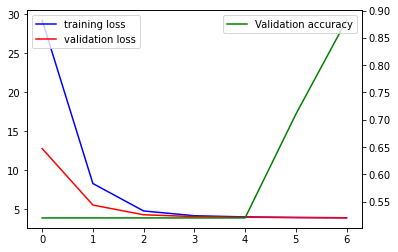

In [19]:
import matplotlib.pyplot as plt
epochs = [i for i in range(num_epochs)]
fig, ax1 = plt.subplots()
ax1.plot(epochs, training_loss_list, 'b-', label='training loss')
ax1.plot(epochs, validation_loss_list, 'r-', label='validation loss')
ax2 = ax1.twinx()
ax2.plot(epochs, accuracy_list, 'g-', label='Validation accuracy')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

## I don't include the model calibration part in my report, it's just a back up if the project is too simple

## ECE matrics to check if needs calibration

In [20]:
import torch.nn.functional as F
def calculate_ece(model, dataloader, n_bins=10):
  model.eval()
  bin_counts = [0] * n_bins
  bin_accuracies = [0] * n_bins
  total_examples = 0
  with torch.no_grad():
    for input_ids, attention_mask, labels in dataloader:
      input_ids = input_ids.to(device)
      attention_mask = attention_mask.to(device)
      labels = labels.to(device)
      outputs = model(input_ids, attention_mask=attention_mask)
      logits = outputs.logits
      probs = F.softmax(logits, dim=1)
      _, preds = torch.max(probs, dim=1)
      for i in range(input_ids.size(0)):
        total_examples += 1
        prob = probs[i][preds[i]]
        bin_index = min(int(prob * n_bins), n_bins - 1)
        bin_counts[bin_index] += 1
        bin_accuracies[bin_index] += (preds[i] == labels[i]).item()
  ece = 0
  for i in range(n_bins):
    if bin_counts[i] > 0:
      accuracy = bin_accuracies[i] / bin_counts[i]
      ece += bin_counts[i] * abs(accuracy - (i + 0.5) / n_bins)
  ece /= total_examples
  return ece

In [21]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import time
from pytorch_toolbelt.losses.focal import FocalLoss
start_time = time.time()


# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')
model.to(device)


num_epochs=7
alpha = 0.20
gamma = 3
temperature=2.0

focal_loss=FocalLoss(alpha=alpha,gamma=gamma)
optimizer = torch.optim.Adam(model.parameters(), lr=0.5e-5)
training_loss_list=[]
validation_loss_list=[]
accuracy_list=[]
for epoch in range(num_epochs): 
  # Training
  model.train()
  total_loss = 0
  for input_ids, attention_mask, labels in train_dataloader:
    input_ids = input_ids.to(device)
    attention_mask = attention_mask.to(device)
    labels = labels.to(device)
    outputs = model(input_ids, attention_mask=attention_mask)
    #logits=outputs.logits/temperature
    #loss = focal_loss(logits, labels)

    #use focal loss here instead of cross entropy
    loss = focal_loss(outputs.logits, labels)
    total_loss += loss.item()
    optimizer.zero_grad()
    loss.backward()

    #Grad clipping
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
    optimizer.step()
  avg_loss = total_loss / len(train_dataloader)
  print(f'Epoch {epoch+1}/{num_epochs}: average training loss = {avg_loss:.4f}')
  training_loss_list.append(avg_loss)
  
  # Validation
  model.eval()
  total_loss = 0
  correct = 0
  total = 0
  with torch.no_grad():
    for input_ids, attention_mask, labels in validation_dataloader:
      input_ids = input_ids.to(device)
      attention_mask = attention_mask.to(device)
      labels = labels.to(device)
      outputs = model(input_ids, attention_mask=attention_mask)
      #logits = outputs.logits / temperature
      #loss = focal_loss(logits, labels)
      loss = focal_loss(outputs.logits, labels)
      total_loss += loss.item()
      predictions = outputs.logits.argmax(dim=1)
      correct += (predictions == labels).sum().item()
      total += labels.size(0)
    avg_loss = total_loss / len(validation_dataloader)
    accuracy = correct / total
    print(f'Epoch {epoch+1}/{num_epochs}: average validation loss = {avg_loss:.4f}, accuracy = {accuracy:.4f}')
    validation_loss_list.append(avg_loss)
    accuracy_list.append(accuracy)

# ECE Result step
ece = calculate_ece(model, validation_dataloader)
print(f'Expected Calibration Error (ECE) = {ece:.4f}')

end_time = time.time()

model.eval()
total_loss = 0
correct = 0
total = 0
with torch.no_grad():
  for input_ids, attention_mask, labels in test_dataloader:
    input_ids = input_ids.to(device)
    attention_mask = attention_mask.to(device)
    labels = labels.to(device)
    outputs = model(input_ids, attention_mask=attention_mask)
    #logits = outputs.logits / temperature
    #loss = focal_loss(logits, labels)
    loss = focal_loss(outputs.logits, labels)
    total_loss += loss.item()
    predictions = outputs.logits.argmax(dim=1)
    correct += (predictions == labels).sum().item()
    total += labels.size(0)
  avg_loss = total_loss / len(test_dataloader)
  accuracy = correct / total
  print(f'Test: average loss = {avg_loss:.4f}, accuracy = {accuracy:.4f}')
elapsed_time = end_time - start_time
print(f'Training took {elapsed_time:.2f} seconds')

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias', 'pre_classifier

Epoch 1/7: average training loss = 0.0624
Epoch 1/7: average validation loss = 0.0414, accuracy = 0.8975
Epoch 2/7: average training loss = 0.0296
Epoch 2/7: average validation loss = 0.0238, accuracy = 0.9125
Epoch 3/7: average training loss = 0.0178
Epoch 3/7: average validation loss = 0.0218, accuracy = 0.9200
Epoch 4/7: average training loss = 0.0118
Epoch 4/7: average validation loss = 0.0244, accuracy = 0.9225
Epoch 5/7: average training loss = 0.0079
Epoch 5/7: average validation loss = 0.0290, accuracy = 0.9200
Epoch 6/7: average training loss = 0.0049
Epoch 6/7: average validation loss = 0.0325, accuracy = 0.9175
Epoch 7/7: average training loss = 0.0044
Epoch 7/7: average validation loss = 0.0357, accuracy = 0.9150
Expected Calibration Error (ECE) = 0.0360
Test: average loss = 0.0414, accuracy = 0.8900
Training took 287.89 seconds
